## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Ход работы:

- Загрузить файл с данными и изучить общую информацию

- Провести предобработку данных

- Провести исследовательский анализ данных

- Составить портрет пользователя каждого региона

- Проверить гипотезы

- Сделать общий вывод

In [170]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [171]:
games = pd.read_csv('/datasets/games.csv')

In [172]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [173]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 16715 строк, 11 столбцов. Есть неверный вывод тип данных в столбцах: Year_of_Release, Critic_Score, User_Score.
Видно имеется много пропусков.

In [174]:
games.isnull().sum() 

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [175]:
games.isnull().sum()/len(games)*100 # пропуски в процентном соотношении

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating обнаружено наличие пропусков. Наибольшее кол-во пропусков в процентом соотношении в столбцах Critic_Score, User_Score, Rating.

In [176]:
games.duplicated().sum() 

0

In [177]:
games[games.duplicated(['Name', 'Platform', 'Year_of_Release'])]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


Выявлены неявные дубликаты. Непонятна суть их происхождения, поэтому не будем применять к ним никаких действий.

 Замените названия столбцов (приведите к нижнему регистру)

In [178]:
games.columns = games.columns.str.lower()

In [179]:
games #проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [180]:
#столбцы с не тем типом данных Year_of_Release, Critic_Score, User_Score.
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Имеются пропуски со значением nan, необходимо от него избавиться и привести значения по годам к целочисленным значениям.

In [181]:
games = games.dropna(subset=['year_of_release']) #удалим пропуски со значение nan
games['year_of_release']=games['year_of_release'].astype(int) #исправим тип данных на целочисленный

/tmp/ipykernel_350/2939243565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['year_of_release']=games['year_of_release'].astype(int) #исправим тип данных на целочисленный


In [182]:
games['year_of_release'].unique() #проверим изменения в столбце

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [183]:
games['user_score'].unique() #проверим значения в столбце user_score

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Есть значение "tbd" и такое значение должно иметь значение object. TBD (to be determined = будет определено). по факту, данное значение имеет тоже значение пропуска. Следовательно nan и tbd равнозначны.

In [184]:
games['user_score']=games['user_score'].replace('tbd', -1) #заменим на -1 значение tbd
games['user_score']=games['user_score'].fillna(-1) # заменим пропуски на -1
games['user_score']=games['user_score'].astype('float') # приведем к типу данных float

/tmp/ipykernel_350/3549351255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['user_score']=games['user_score'].replace('tbd', -1) #заменим на -1 значение tbd
/tmp/ipykernel_350/3549351255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['user_score']=games['user_score'].fillna(-1) # заменим пропуски на -1
/tmp/ipykernel_350/3549351255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [185]:
games['critic_score'].unique() #проверка значений

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [186]:
games['critic_score']=games['critic_score'].fillna(-1) #изменим пропуски со значение nan на ноль
games['critic_score']=games['critic_score'].astype(int) #исправим тип данных на целочисленный


/tmp/ipykernel_350/253634885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['critic_score']=games['critic_score'].fillna(-1) #изменим пропуски со значение nan на ноль
/tmp/ipykernel_350/253634885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['critic_score']=games['critic_score'].astype(int) #исправим тип данных на целочисленный


In [187]:
games['critic_score'].unique() #проверим значения в столбце

array([76, -1, 82, 80, 89, 58, 87, 91, 61, 97, 95, 77, 88, 83, 94, 93, 85,
       86, 98, 96, 90, 84, 73, 74, 78, 92, 71, 72, 68, 62, 49, 67, 81, 66,
       56, 79, 70, 59, 64, 75, 60, 63, 69, 50, 25, 42, 44, 55, 48, 57, 29,
       47, 65, 54, 20, 53, 37, 38, 33, 52, 30, 32, 43, 45, 51, 40, 46, 39,
       34, 41, 36, 31, 27, 35, 26, 19, 28, 23, 24, 21, 17, 13])

In [188]:
games.isnull().sum() 

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6678
dtype: int64

Произвели замену пропусков в столбцах Year_of_Release, Critic_Score, User_Score и привели к другому типу данных, так как в ходе исследования нам понадобятся их значения.

Пропуски в столбце Rating — рейтинг от организации ESRB, определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Не будем проводить замену пропусков, так как нет корректной замены для этого случая. 

Есть пропуск в столбцах name и genre, но их очень мало, скорее всего они взаимосвязаны, некорректно будет их исправлять.

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [189]:
games['sales_total']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']


/tmp/ipykernel_350/979042203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['sales_total']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']


In [190]:
games


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,NaN,0.01


In [192]:
#удаляем пропуски в столбцах name и genre
games = games.dropna(subset=['name'])
games = games.dropna(subset=['genre'])

In [193]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [194]:
games['rating']=games['rating'].fillna('undefined')

In [195]:
games.isnull().sum() 

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
sales_total        0
dtype: int64

Рейтинг ESRB - это возрастной рейтинг помогает потребителю решить, подходит ли игра для предполагаемого пользователя, и гарантируют, что дети не увидят неприемлемый контент. Сама организация основана с 1994 года. Пропуски в таблице могли возникнуть в играх выпущенных до 1994г или в контексте того, что рейтинг неустановлен. 

Заменим пропуски в столбце рейтинга на значение 'undefined'.

critic_score и user_score могли получить пропуски либо из-за отсутсвия платформ с выставлением оценки от пользователя и критка во время которое блы выпущена игра, либо игру могли просто не оценивать

Пропуски в столбцах name, genre, year_of_realis могли возникнуть по причине отсутствия названия, жанра или неопределенного года выпуска.

 По итогу этапа предообработки данных выполнили замену пропусков в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Наибольшее кол-во пропусков в процентом соотношении в столбцах Critic_Score, User_Score, Rating.

В столбцах Year_of_Release, Critic_Score, User_Score значения привели к другому типу данных, так как в ходе исследования нам понадобятся их значения.

#### Проведите исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

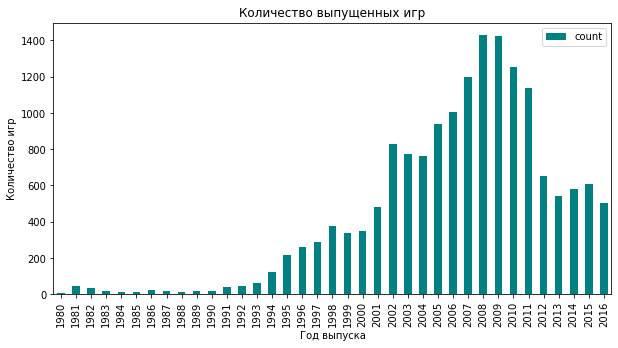

In [196]:
game_count = games.pivot_table(index = 'year_of_release', values = 'name', aggfunc=['count'])
game_count.columns = ['count']
game_count.plot(kind='bar', color='#008080', figsize=(10,5))
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Количество выпущенных игр')
plt.show()

По графику видно, что игры до 1994 года практически не выпускались, по причине еще не развитости данного сигмента. Далее идет рост по кол-ву выпускаемых игр. Самый пик приходится с 2007-2011 года, потом идет резкий спад. Возможно из-за кризиса или развития технологий, которое привело к снижению интереса к игровым консолям.

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

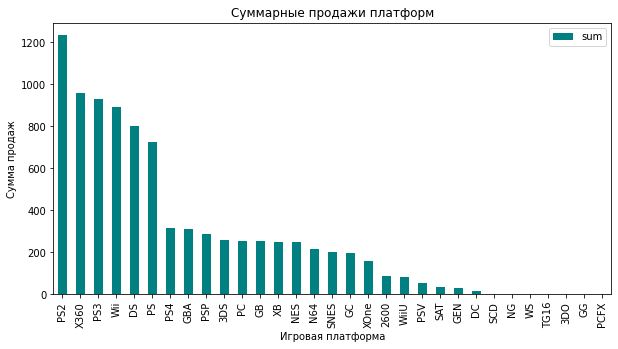

In [197]:
platforms_sale = games.pivot_table(index = 'platform', values = 'sales_total', aggfunc=['sum'])
platforms_sale.columns = ['sum']
platforms_sale=platforms_sale.sort_values('sum', ascending = False)
platforms_sale.plot(kind='bar', color='#008080', figsize=(10,5))
plt.xlabel('Игровая платформа')
plt.ylabel('Сумма продаж')
plt.title('Суммарные продажи платформ')
plt.show()

По графику видно, что самая популярная игровая платформа это PS2, потом идут Xbox360, PS3, Wii, DS, PS. 

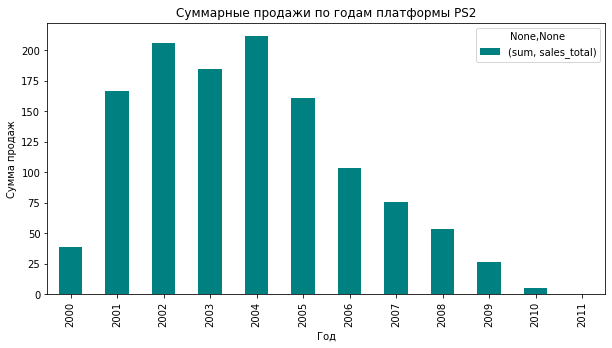

In [198]:
#построим график Суммарные продажи по годам платформы PS2
games.query('platform=="PS2"').pivot_table(index = 'year_of_release', values = 'sales_total', aggfunc=['sum']).plot(kind='bar', color='#008080', figsize=(10,5))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('Суммарные продажи по годам платформы PS2')
plt.show()

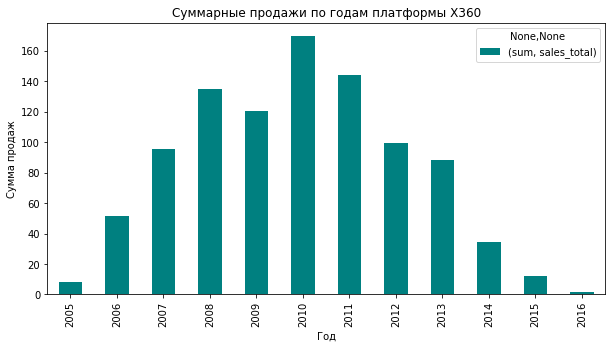

In [199]:
#построим график Суммарные продажи по годам платформы X360
games.query('platform=="X360"').pivot_table(index = 'year_of_release', values = 'sales_total', aggfunc=['sum']).plot(kind='bar', color='#008080', figsize=(10,5))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('Суммарные продажи по годам платформы X360')
plt.show()

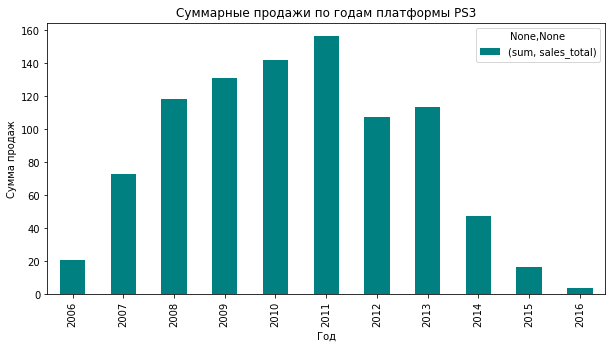

In [200]:
#построим график Суммарные продажи по годам платформы PS3
games.query('platform=="PS3"').pivot_table(index = 'year_of_release', values = 'sales_total', aggfunc=['sum']).plot(kind='bar', color='#008080', figsize=(10,5))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('Суммарные продажи по годам платформы PS3')
plt.show()

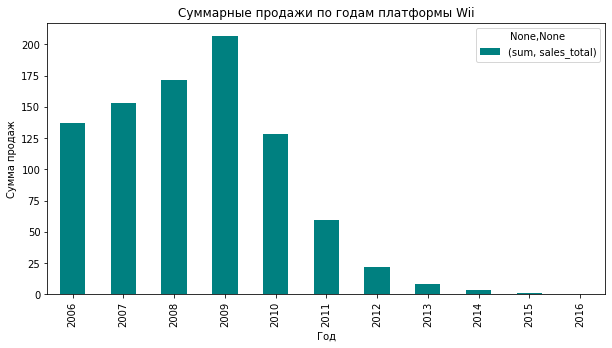

In [201]:
#построим график Суммарные продажи по годам платформы Wii
games.query('platform=="Wii"').pivot_table(index = 'year_of_release', values = 'sales_total', aggfunc=['sum']).plot(kind='bar', color='#008080', figsize=(10,5))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('Суммарные продажи по годам платформы Wii')
plt.show()

По графикам видно, что средняя продолжительность консоли 10-11 лет. В начале всегда идет рост по продажам и потом сильно уменьшается.

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Актуальный период считается последние 4 года, так как нам нужно выполнить прогноз на 2017 год, то актуальнй период получается с 2013-2016.


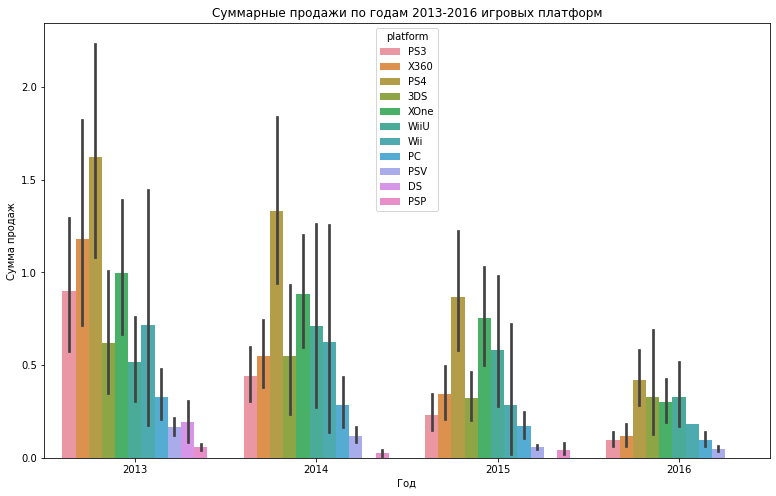

In [203]:
df=games.query('year_of_release>=2013')
plt.figure(figsize=(13, 8))
sns.barplot(x='year_of_release', y='sales_total', hue='platform', data=df)
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('Суммарные продажи по годам 2013-2016 игровых платформ')
plt.show()

В 2013 году были более высокие продажи, чем в последующих, рынок игровых консолей снизился. Самой популярной консулью является PS4.

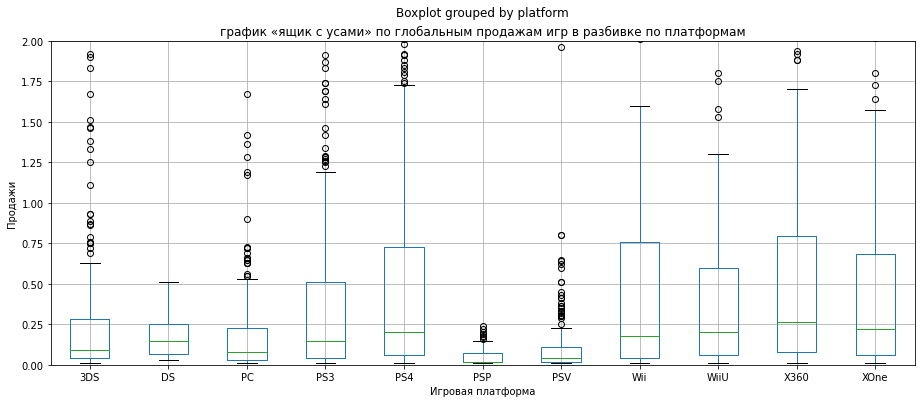

In [204]:
df[['sales_total', 'platform']].boxplot(column='sales_total', by='platform', figsize= (15, 6))
plt.xlabel('Игровая платформа')
plt.ylabel('Продажи')
plt.title('график «ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.ylim(0,2)
plt.show()

Максимальная прибыль у платформ PS4,  X360, Wii, XOne - в диапозоне от 1.5 до 1.75 млн
Медиана по топовым платформам варьируется от 0,2 до 0,25 млн долларов прибыли за игру.
Выделяется PSP - у него показатель сильно ниже. Медиана < 0,1 миллиона долларов, верхняя граница примерно 0,2 млн.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [206]:
df.year_of_release.min()

2013

Посмотрите, как влияют на продажи отзывы пользователей и критиков внутри платформы PS4

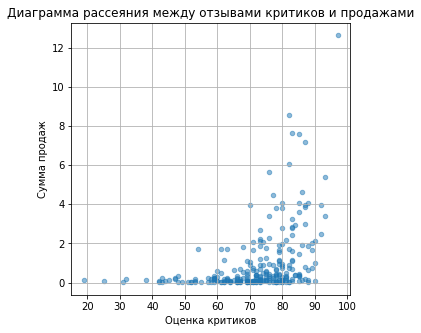

0.41

In [207]:
#по отзывам от критиков
games_ps4 = df[(df['platform'] == 'PS4') & (df['critic_score'] > -1)].copy()
#games_ps4 = games_ps4.pivot_table(index = 'critic_score', values = 'sales_total').plot(alpha=0.5, grid=True, style='o', figsize=(5, 5))
games_ps4.plot(kind='scatter', x='critic_score', y='sales_total',alpha=0.5, grid=True, style='o', figsize=(5, 5))
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж')
plt.title('Диаграмма рассеяния между отзывами критиков и продажами')
plt.show()
games_ps4['critic_score'].corr(games_ps4['sales_total']).round(2)

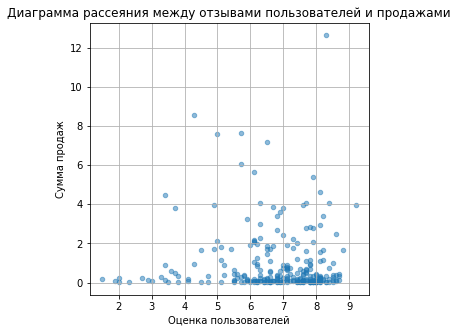

-0.03

In [209]:
#по отзывам от пользователей
games_ps4_2= df[(df['platform'] == 'PS4') & (df['user_score'] > -1)].copy()
games_ps4_2.plot(kind='scatter', x='user_score', y='sales_total',alpha=0.5, grid=True, style='o', figsize=(5, 5))
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумма продаж')
plt.title('Диаграмма рассеяния между отзывами пользователей и продажами')
plt.show()
games_ps4_2['user_score'].corr(games_ps4_2['sales_total']).round(2)

Посмотрите, как влияют на продажи отзывы пользователей и критиков внутри платформы PS3

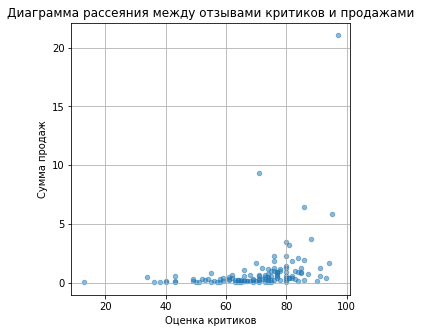

0.33

In [210]:
#по отзывам от критиков
games_ps3 = df[(df['platform'] == 'PS3') & (df['critic_score'] > -1)].copy()
games_ps3.plot(kind='scatter', x='critic_score', y='sales_total',alpha=0.5, grid=True, style='o', figsize=(5, 5))
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж')
plt.title('Диаграмма рассеяния между отзывами критиков и продажами')
plt.show()
games_ps3['critic_score'].corr(games_ps3['sales_total']).round(2)

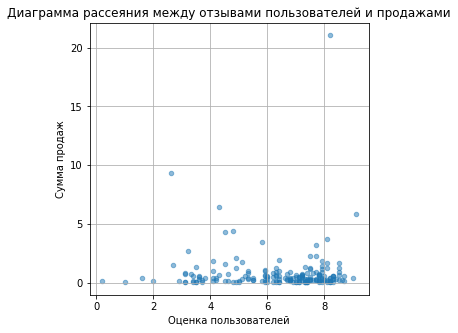

0.0

In [211]:
#по отзывам от пользователей
games_ps3_2= df[(df['platform'] == 'PS3') & (df['user_score'] > -1)].copy()
games_ps3_2.plot(kind='scatter', x='user_score', y='sales_total',alpha=0.5, grid=True, style='o', figsize=(5, 5))
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумма продаж')
plt.title('Диаграмма рассеяния между отзывами пользователей и продажами')
plt.show()
games_ps3_2['user_score'].corr(games_ps3_2['sales_total']).round(2)

Посмотрите, как влияют на продажи отзывы пользователей и критиков внутри платформы X360

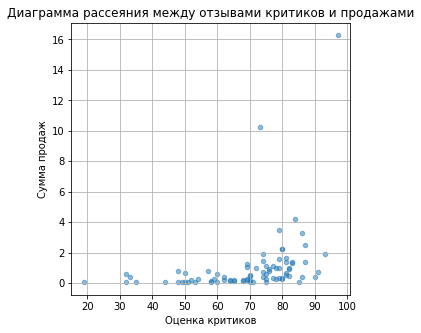

0.35

In [212]:
#по отзывам от критиков
games_x360 = df[(df['platform'] == 'X360') & (df['critic_score'] > -1)].copy()
games_x360.plot(kind='scatter', x='critic_score', y='sales_total',alpha=0.5, grid=True, style='o', figsize=(5, 5))
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж')
plt.title('Диаграмма рассеяния между отзывами критиков и продажами')
plt.show()
games_x360['critic_score'].corr(games_x360['sales_total']).round(2)

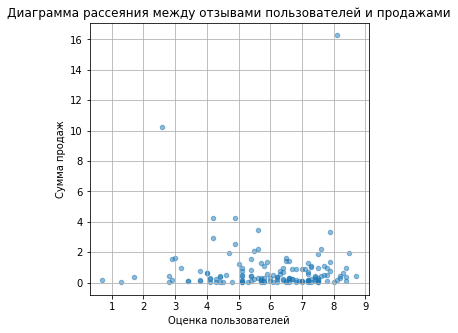

-0.01

In [213]:
#по отзывам от пользователей
games_x360_2= df[(df['platform'] == 'X360') & (df['user_score'] > -1)].copy()
games_x360_2.plot(kind='scatter', x='user_score', y='sales_total',alpha=0.5, grid=True, style='o', figsize=(5, 5))
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумма продаж')
plt.title('Диаграмма рассеяния между отзывами пользователей и продажами')
plt.show()
games_x360_2['user_score'].corr(games_x360_2['sales_total']).round(2)

Посмотрите, как влияют на продажи отзывы пользователей и критиков внутри платформы XOne

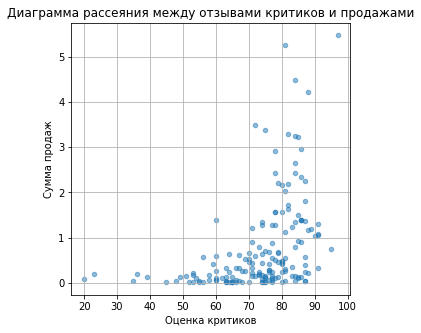

0.42

In [214]:
#по отзывам от критиков
games_xone = df[(df['platform'] == 'XOne') & (df['critic_score'] > -1)].copy()
games_xone.plot(kind='scatter', x='critic_score', y='sales_total',alpha=0.5, grid=True, style='o', figsize=(5, 5))
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж')
plt.title('Диаграмма рассеяния между отзывами критиков и продажами')
plt.show()
games_xone['critic_score'].corr(games_xone['sales_total']).round(2)

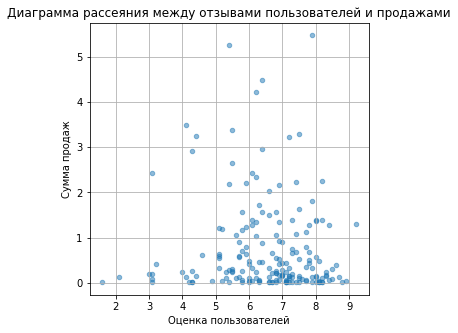

-0.07

In [215]:
#по отзывам от пользователей
games_xone_2= df[(df['platform'] == 'XOne') & (df['user_score'] > -1)].copy()
games_xone_2.plot(kind='scatter', x='user_score', y='sales_total',alpha=0.5, grid=True, style='o', figsize=(5, 5))
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумма продаж')
plt.title('Диаграмма рассеяния между отзывами пользователей и продажами')
plt.show()
games_xone_2['user_score'].corr(games_xone_2['sales_total']).round(2)

Посмотрите, как влияют на продажи отзывы пользователей и критиков внутри платформы 3DS

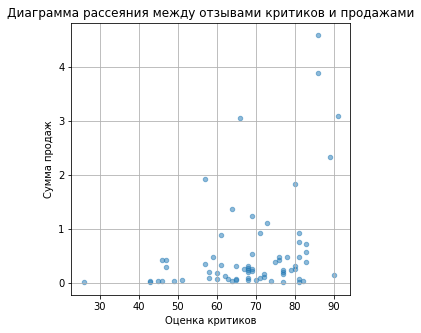

0.36

In [216]:
#по отзывам от критиков
games_3ds = df[(df['platform'] == '3DS') & (df['critic_score'] > -1)].copy()
games_3ds.plot(kind='scatter', x='critic_score', y='sales_total',alpha=0.5, grid=True, style='o', figsize=(5, 5))
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж')
plt.title('Диаграмма рассеяния между отзывами критиков и продажами')
plt.show()
games_3ds['critic_score'].corr(games_3ds['sales_total']).round(2)

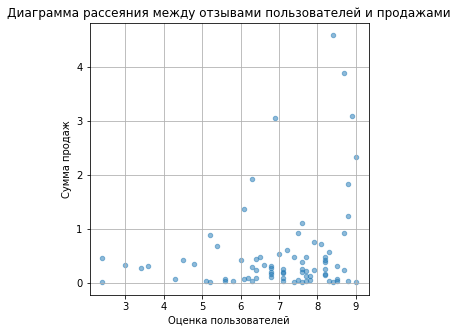

0.24

In [217]:
#по отзывам от пользователей
games_3ds_2= df[(df['platform'] == '3DS') & (df['user_score'] > -1)].copy()
games_3ds_2.plot(kind='scatter', x='user_score', y='sales_total',alpha=0.5, grid=True, style='o', figsize=(5, 5))
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумма продаж')
plt.title('Диаграмма рассеяния между отзывами пользователей и продажами')
plt.show()
games_3ds_2['user_score'].corr(games_3ds_2['sales_total']).round(2)

Посмотрели, как влияют на продажи отзывы пользователей и критиков внутри платформ PS4, PS3, XOne, X360 и 3DS.

В большинстве случаев на продажи консолей влияет больше оценка критиков, корреляция там больше.
В случае с платформой 3DS там произошло наоборот, больше влияние оказали отзывы пользователей. Но это 1 случай из 5.

Соотнесите выводы с продажами игр на других платформах. : Данные по корреляции между выручкой и оценкой по платформам PS2, X360, PS3, PS и XOne более или менее совпадает с общими данными по датафрейму.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

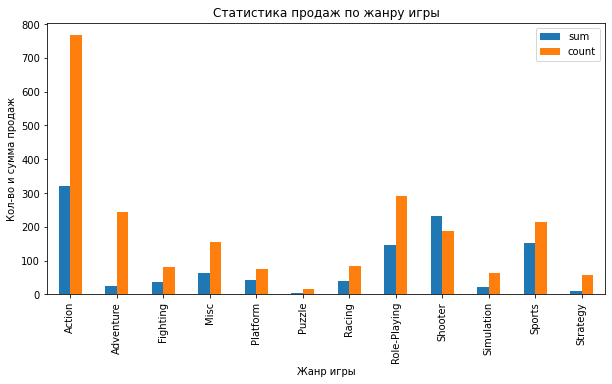

In [218]:
genre_pt = df.pivot_table(index = 'genre', values = 'sales_total', aggfunc = ['sum', 'count'])
genre_pt.columns = ['sum', 'count']
genre_pt.plot(kind='bar', figsize=(10,5))
plt.xlabel('Жанр игры')
plt.ylabel('Кол-во и сумма продаж')
plt.title('Статистика продаж по жанру игры')
plt.show()

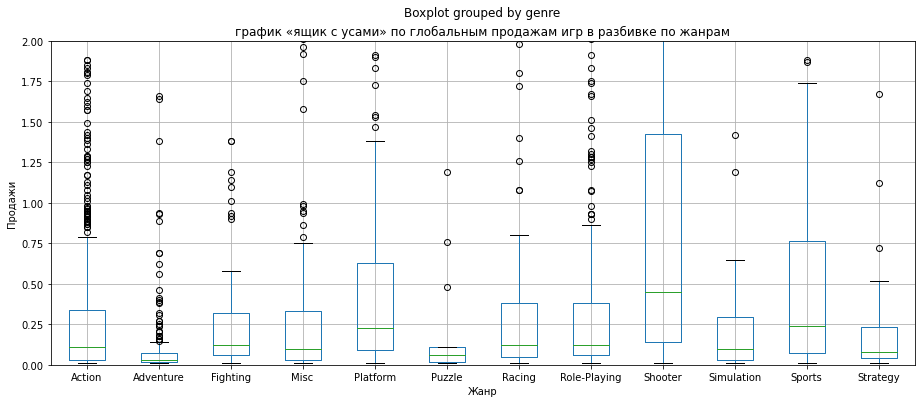

In [219]:
df[['sales_total', 'genre']].boxplot(column='sales_total', by='genre', figsize= (15, 6))
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.title('график «ящик с усами» по глобальным продажам игр в разбивке по жанрам')
plt.ylim(0,2)
plt.show()

Больше всего игр жанра Action, Role-playing, adventure, shooter, спорт.
У шутеров и спорта больший показатель средней медианы продаж. Наименьший показатель медианы у Приключений.
Скорее всего это связано со сложностью производства остальных (больше затрат уходит), чем у игр категории Adventure. 

Меньше всего пользуются популярностью жанры Пазл и Стратегии и прибыль тоже мала.

#### Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Text(0.5, 1.0, 'Статистика продаж по жанру игры в Японии')

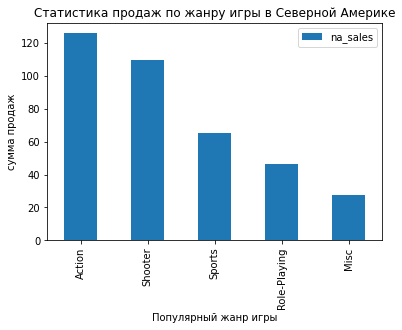

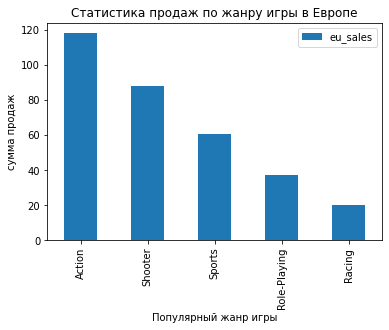

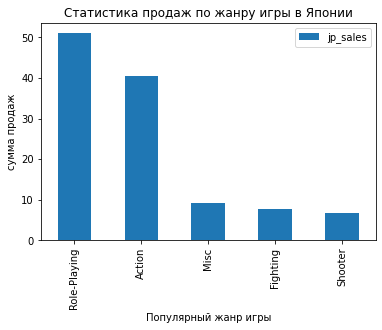

In [220]:
df.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.xlabel('Популярный жанр игры')
plt.ylabel('сумма продаж')
plt.title('Статистика продаж по жанру игры в Северной Америке')
df.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.xlabel('Популярный жанр игры')
plt.ylabel('сумма продаж')
plt.title('Статистика продаж по жанру игры в Европе')
df.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
plt.xlabel('Популярный жанр игры')
plt.ylabel('сумма продаж')
plt.title('Статистика продаж по жанру игры в Японии')


В Северной Америке и Европе самым популярным жанром является - Экшн и Шутер. В Японии популярен жанр - Ролевая игра.

Самые популярные жанры (топ-5). Поясните разницу.

Text(0.5, 1.0, 'Статистика продаж игровой консоли в Японии')

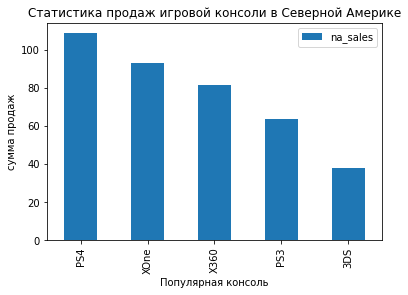

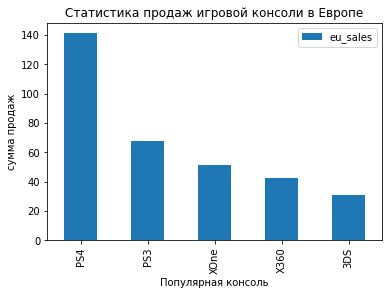

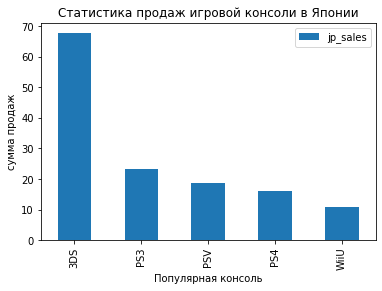

In [221]:
df.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.xlabel('Популярная консоль')
plt.ylabel('сумма продаж')
plt.title('Статистика продаж игровой консоли в Северной Америке')
df.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.xlabel('Популярная консоль')
plt.ylabel('сумма продаж')
plt.title('Статистика продаж игровой консоли в Европе')
df.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
plt.xlabel('Популярная консоль')
plt.ylabel('сумма продаж')
plt.title('Статистика продаж игровой консоли в Японии')

В Северной Америке самой популярной консолью является - ХOne и PS4. В Европе популярна PS4. В Японии популярна консоль - 3DS.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Text(0.5, 1.0, 'Статистика рейтинга ESRB в Японии')

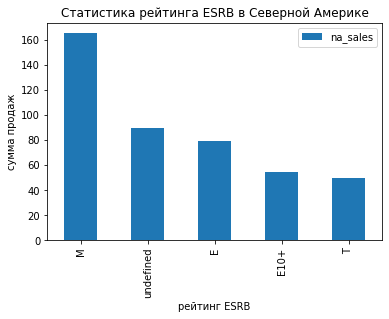

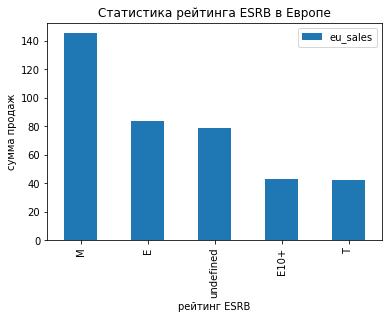

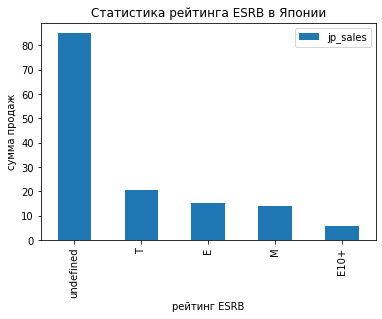

In [222]:
df.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.xlabel('рейтинг ESRB')
plt.ylabel('сумма продаж')
plt.title('Статистика рейтинга ESRB в Северной Америке')
df.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.xlabel('рейтинг ESRB')
plt.ylabel('сумма продаж')
plt.title('Статистика рейтинга ESRB в Европе')
df.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
plt.xlabel('рейтинг ESRB')
plt.ylabel('сумма продаж')
plt.title('Статистика рейтинга ESRB в Японии')

В Северной америке и Европе наиболее распространенный рейтинг M- подходит для лиц старше 17 лет.
В Японии же - рейтинг T, который подходит для лиц старше 13 лет.

#### Проверьте гипотезы

Формулировка гипотез будет происходить по принципу:

    • Нулевая: параметры равны
    • Альтернативная: двусторонняя - параметры не равны.


Для проверки обеих гипотез будем использовать t-критерий Стьюдента, т.к. генеральные совокупности не зависят друг от друга.

Есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(array1, array2, equal_var, alternative). equal_var - по умолчанию True, alternative - по умолчанию 'two-sided'.


Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотезы:

Нулевая гипотеза (Н0): средний пользовательский рейтинг платформ Xbox One и PC равны

Альтернативная гипотеза (Н1): средний пользовательский рейтинг платформ Xbox One и PC не равны

In [224]:
pc = df[(df['platform'] == 'PC') & (df['user_score'] > -1)]['user_score']
xbox = df[(df['platform'] == 'XOne') & (df['user_score'] > -1)]['user_score']

alpha = 0.05

results = st.ttest_ind(pc, xbox)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports разные.

Гипотезы:

Нулевая гипотеза (Н0): средний пользовательский рейтинг жанров Action и Sports равны

Альтернативная гипотеза (Н1): средний пользовательский рейтинг жанров Action и Sports не равны

In [225]:
action = df[(df['genre'] == 'Action') & (df['user_score'] > 0)]['user_score']
sports = df[(df['genre'] == 'Sports') & (df['user_score'] > 0)]['user_score']

alpha = 0.05

results = st.ttest_ind(action, sports)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Вывод: 
для первой гипотезы о равенстве среднего пользовательского рейтинга платформ Xbox One и PC, опровергнуть нулевую гипотезу не удалось. А во втрой гипотезе средние пользовательские рейтинги жанров Action и Sports не одинаковые.

#### Общий вывод

Нам были предоставлены данные по игровым консолям для анализа, чтобы  выявить определяющие успешность продаж игры и ее закономерность.

В ходе работы было выполнено:

- Загрузка файла с данными и изучение общей информации
        
         - В таблице 16715 строк, 11 столбцов. Есть неверный вывод тип данных в столбцах: Year_of_Release, Critic_Score,   User_Score, имеется много пропусков.

- Проведена предобработка данных
        
         - В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating обнаружено наличие пропусков. Наибольшее кол-во пропусков в процентом соотношении в столбцах Critic_Score, User_Score, Rating.

         - Произвели замену пропусков в столбцах Year_of_Release, Critic_Score, User_Score и привели к другому типу данных, так как в ходе исследования нам понадобятся их значения.

         - Пропуски в столбце Rating — рейтинг от организации ESRB, определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Заменили пропуски в столбце рейтинга на значение 'undefined'.
         
         - critic_score и user_score могли получить пропуски либо из-за отсутствия платформ с выставлением оценки от пользователя и критика в то время которое была выпущена игра, либо игру могли просто не оценивать

         - Пропуски в столбцах name, genre, year_of_realis могли возникнуть по причине отсутствия названия, жанра или неопределенного года выпуска.
         
- Проведен исследовательский анализ данных

         - По графику видно, что игры до 1994 года практически не выпускались, по причине еще не развитости данного сигмента. Далее идет рост по кол-ву выпускаемых игр. Самый пик приходится с 2007-2011 года, потом идет резкий спад. Возможно из-за кризиса или развития технологий, которое привело к снижению интереса к игровым консолям.

         - По графикам видно, что средняя продолжительность консоли 10-11 лет. В начале всегда идет рост по продажам и потом сильно уменьшается.

         - В 2013 году были более высокие продажи, чем в последующих, рынок игровых консолей снизился. 
        
         - Самой популярной консулью является PS4.

         - Посмотрели, как влияют на продажи отзывы пользователей и критиков внутри платформ PS4, PS3, XOne, X360 и 3DS.В большинстве случаев на продажи консолей влияет больше оценка критиков, корреляция там больше.
        
         - Больше всего игр жанра Action, Role-playing, adventure, shooter, спорт.
        У шутеров и спорта больший показатель средней медианы продаж. Наименьший показатель медианы у Приключений. Скорее всего это связано со сложностью производства остальных (больше затрат уходит), чем у игр категории Adventure. 

         - Меньше всего пользуются популярностью жанры Пазл и Стратегии и прибыль тоже мала.
        
- Составлен портрет пользователя каждого региона

         - В Северной Америке и Европе самым популярным жанром является - Экшн и Шутер. В Японии популярен жанр - Ролевая игра.
         - В Северной Америке самой популярной консолью является - ХOne и PS4. В Европе популярна PS4. В Японии популярна консоль - 3DS.
         - В Северной америке и Европе наиболее распространенный рейтинг M- подходит для лиц старше 17 лет. В Японии же - рейтинг T, который подходит для лиц старше 13 лет.
        
- Проведена проверка гипотезы

         - Для первой гипотезы о равенстве среднего пользовательского рейтинга платформ Xbox One и PC, опровергнуть нулевую гипотезу не удалось. А во втрой гипотезе средние пользовательские рейтинги жанров Action и Sports не одинаковые.

